# <center> <font size = 24 color = 'steelblue'> <b>Exploration and Visualization

<div class="alert alert-block alert-info">
    
<font size = 4> 

**By the end of this notebook you will be able to:**
- Learn to explore text data
- Visualize text data using wordcloud

# <a id= 'e0'> 
<font size = 4>
    
**Table of contents:**<br>
[1. Installation and import of necessary packages](#e1)<br>
[2. Download the necessary corpus from NLTK](#e2)<br>
[3. Data extraction](#e3)<br>
>[a. Check the files available in the corpus](#3.a)<br>
>[b. Use the 'Canon_G3.txt'](#3.b)<br>

[4. Data exploration and visualization](#e4)<br>
> [4.1 Basic exploration](#4.1)<br>
> [4.1 Detailed exploration](#4.2)<br>
> [4.3 Word frequency analysis](#4.3)<br>
> [4.4 Wordcloud generation](#4.4)<br>

##### <a id = 'e1'>
<font size = 10 color = 'midnightblue'> <b>Installation and import of necessary packages

In [6]:
!pip install pandas matplotlib wordcloud

In [7]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[top](#e0)

##### <a id = 'e2'>
<font size = 10 color = 'midnightblue'> <b>Download necessary corpus and models from nltk

In [8]:
nltk.download('product_reviews_1')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package product_reviews_1 to
[nltk_data]     /Users/toddwalters/nltk_data...
[nltk_data]   Unzipping corpora/product_reviews_1.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/toddwalters/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toddwalters/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<div class="alert alert-block alert-info">
<font size = 4> 
    
<center><b>The product reviews corpus contains multiple products reviews for specific products.


[top](#e0)

##### <a id = 'e3'>
<font size = 10 color = 'midnightblue'> <b>Data extraction

<a id = '3.a'>
<font size = 6 color = pwdrblue>  <b>Check the files available in the corpus

In [9]:
file_ids = nltk.corpus.product_reviews_1.fileids()
print(file_ids)

['Apex_AD2600_Progressive_scan_DVD player.txt', 'Canon_G3.txt', 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt', 'Nikon_coolpix_4300.txt', 'Nokia_6610.txt', 'README.txt']


<a id = '3.b'>
<font size = 6 color = pwdrblue>  <b>Use the 'Canon_G3.txt' review file for this exercise

<div class="alert alert-block alert-success">
<font size = 4> 
    
**To extract text data from the file, there are multiple ways**

  - `reviews` function extracts the reviews in an object form.
  - `raw` function extracts the raw data from the text file.
  - `sents` function extract tokenised list of all sentences in all the reviews.

In [10]:
reviews = nltk.corpus.product_reviews_1.reviews(file_ids[1])
raw_text = nltk.corpus.product_reviews_1.raw(file_ids[1])
review_sentences = nltk.corpus.product_reviews_1.sents(file_ids[1])

[top](#e0)

##### <a id = 'e4'>
<font size = 10 color = 'midnightblue'> <b>Data Exploration

<a id = '4.a'>
<font size = 6 color = pwdrblue>  <b>Basic exploration

<div class="alert alert-block alert-success">
<font size = 4> 

**Let's start with simple exploration to check**
  - The total number of reviews,
  - Total number of review sentences,
  - Title for each review, and
  - Extract complete review texts

In [11]:
print(f"Total no. of review available : {len(reviews)}")

Total no. of review available : 45


In [12]:
print(f"Total review sentences : {len(review_sentences)}")

Total review sentences : 597


In [13]:
review_titles = {f"rev_{i+1}" : reviews[i].title for i in range(len(reviews))}
for tit in review_titles.keys():
    print(f"{tit} : {review_titles[tit]}")

rev_1 : excellent picture quality / color
rev_2 : cool toy
rev_3 : canon g3 ? incredible camera
rev_4 : great camera
rev_5 : have n't had practice but i 'm already in love with it
rev_6 : excellent for the semi-serious amateur
rev_7 : fantastic digital camera
rev_8 : the best of everything
rev_9 : pure class & quality - a work of craftmanship
rev_10 : great camera
rev_11 : if you love an slr 35mm but need to go digital
rev_12 : outstanding camera
rev_13 : love my new g 3
rev_14 : noise level
rev_15 : the pictures are brillient
rev_16 : great gadget
rev_17 : ok for a digital camera
rev_18 : within its limitations
rev_19 : knock your socks off great
rev_20 : great digital camera
rev_21 : canon never ceases to amaze
rev_22 : love the g2
rev_23 : awesome pro-sumer camera
rev_24 : upgraded from g2 and not looking back
rev_25 : the catch
rev_26 : 100 % happy
rev_27 : the best 4mp out there
rev_28 : love it more and more
rev_29 : the last digital camera i 'll buy
rev_30 : boxy ? no -- gorgeou

In [14]:
review_texts = []
for i in range(len(reviews)):
    review_lines = reviews[i].review_lines
    line = ''
    for j in range(len(review_lines)):
        line += ' '.join(review_lines[j].sent)
    review_texts.append(line)


In [15]:
print("Complete Review Texts".center(150))
i = 1
for rev in review_texts:
    print(f"Title --> {review_titles[f'rev_{i}']} :\n\n{rev}\n")
    print(f"Summary --> \nLen of review : {len(rev.split())} words.\n")
    i += 1

                                                                Complete Review Texts                                                                 
Title --> excellent picture quality / color :

i recently purchased the canon powershot g3 and am extremely satisfied with the purchase .the camera is very easy to use , in fact on a recent trip this past week i was asked to take a picture of a vacationing elderly group .after i took their picture with their camera , they offered to take a picture of us .i just told them , press halfway , wait for the box to turn green and press the rest of the way .they fired away and the picture turned out quite nicely . ( as all of my pictures have thusfar ) .a few of my work constituants owned the g2 and highly recommended the canon for picture quality .i ' m easily enlarging pictures to 8 1 / 2 x 11 with no visable loss in picture quality and not even using the best possible setting as yet ( super fine ) .ensure you get a larger flash , 128 or 256 ,

[top](#t0)

<a id = '4.2'>
<font size = 6 color = pwdrblue>  <b>Detailed exploration

<font size = 5 color = seagreen>  <b>Words per review

In [16]:
words_per_review = [len(rev) for rev in review_texts]

In [17]:
print(f"Largest review: {max(words_per_review)}")
print(f"Smallest review: {min(words_per_review)}")
print(f"Average words per review: {sum(words_per_review)/ len(words_per_review):.0f}")

Largest review: 5568
Smallest review: 73
Average words per review: 1255


<font size = 5 color = seagreen>  <b>Average sentence length analysis

In [18]:
sent_length = [len(rev) for rev in review_sentences]

In [19]:
print(f"Largest sentence: {max(sent_length)}")
print(f"Smallest sentence: {min(sent_length)}")
print(f"Average sentence length: {sum(sent_length)/ len(sent_length):.0f}")

Largest sentence: 84
Smallest sentence: 1
Average sentence length: 20


<font size = 5 color = seagreen>  <b>Review title analysis

<div class="alert alert-block alert-success">
<font size = 4> 
    
- Explore the review titles to understand the sentiments.
- For this we need to extract the titles using the review object.
- This we ave done earlier.

In [20]:
titles = ' '.join(list(review_titles.values()))

In [21]:
# tokenization
tokens = nltk.word_tokenize(titles)

[top](#e0)

<a id = '4.3'>
<font size = 6 color = pwdrblue>  <b>Word frequency distribution

<div class="alert alert-block alert-success">
<font size = 4> 
    
- Analyze the word frequency using the _**Freq_dist**_ function of nltk.
- This accounts for frequency of each word in the text being analyzed.
- Create a dataframe for ease of analysis.

In [22]:
freq_dist = pd.DataFrame({"words" : nltk.FreqDist(tokens).keys(), "freq" : nltk.FreqDist(tokens).values()})
freq_dist.sort_values('freq',ascending=False, inplace = True, ignore_index=True)
freq_dist.freq.sum()

np.int64(213)

<font size = 5 color = seagreen> **Stopword analysis**

<div class="alert alert-block alert-success">
<font size = 4> 
    
**Clean the data further to remove the frequently occurring stopwords.**

In [23]:
stp_words = nltk.corpus.stopwords.words('english')

In [24]:
stp_wrd_freq_dist = freq_dist[freq_dist.words.isin(stp_words)].reset_index(drop = True)
stp_wrd_freq_dist[:10]

,words,freq
0,the,11
1,it,5
2,i,5
3,more,4
4,to,3
5,of,3
6,for,3
7,but,3
8,a,2
9,and,2


<font size = 5 color = seagreen> <b>Use a bar chart to analyze the most frequent words in the text.
    

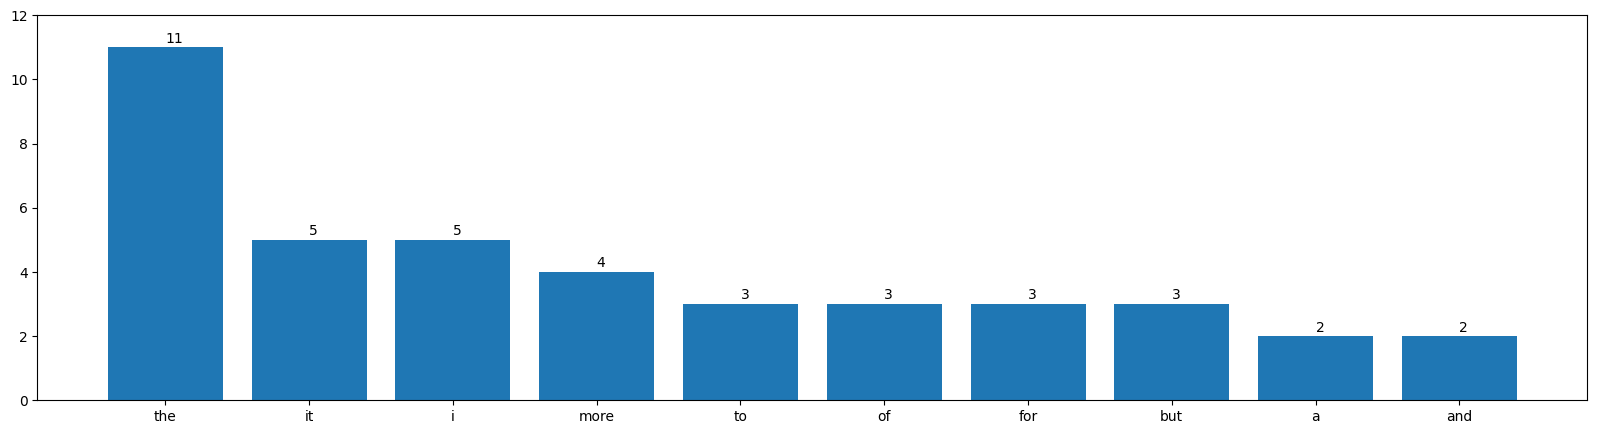

In [25]:
plt.figure(figsize = (20,5))
plt.bar(x = stp_wrd_freq_dist.words[:10], height=stp_wrd_freq_dist.freq[:10])
for i in range(10):
    plt.annotate(f"{stp_wrd_freq_dist.freq[i]}",xy = (i, stp_wrd_freq_dist.freq[i]+0.15) )
plt.ylim(0,12)
plt.show()

<font size = 5 color = seagreen> <b>Perform a granular analysis exploring the top 20 words by frequency.

In [26]:
top_20_words = freq_dist[~(freq_dist.words.isin(stp_words))].reset_index(drop = True)
top_20_words

,words,freq
0,camera,14
1,best,7
2,digital,6
3,love,6
4,great,6
...,...,...
91,noise,1
92,3,1
93,g,1
94,new,1


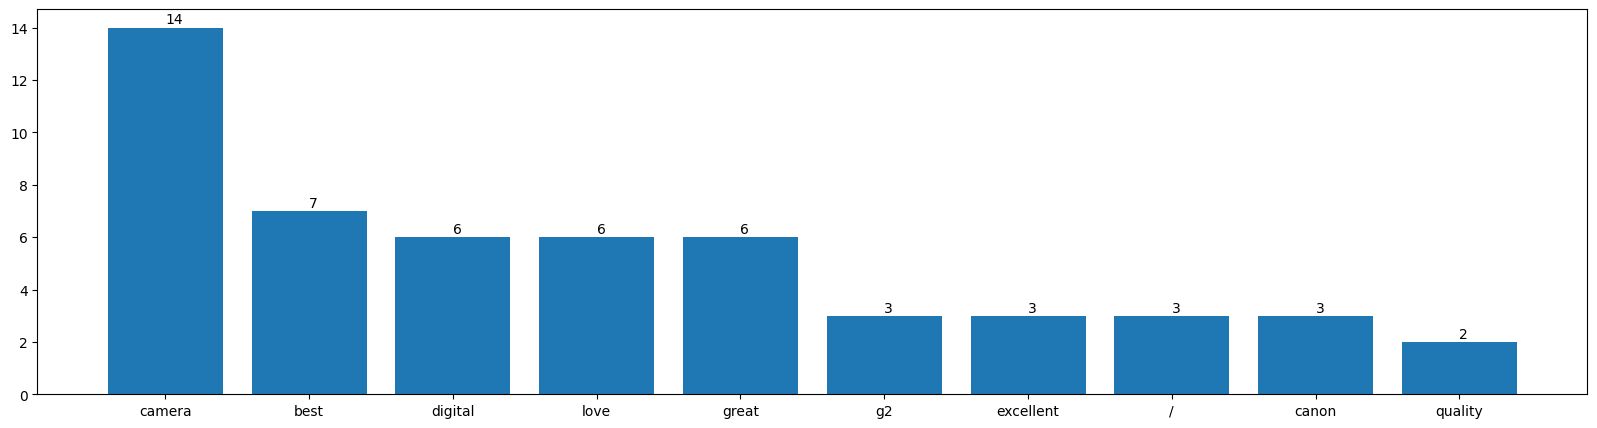

In [27]:
plt.figure(figsize = (20,5))
plt.bar(x = top_20_words.words[:10], height=top_20_words.freq[:10])
for i in range(10):
    plt.annotate(f"{top_20_words.freq[i]}",xy = (i, top_20_words.freq[i]+0.15) )
# plt.ylim(0,12)
plt.show()

<div class="alert alert-block alert-success">
<font size = 4>

- Looking at the plot it seems terms like `camera`, `cannon`, `g2` which are terms identical to product name are present in abundance.
- However they are not contributing much to analysis, hence these may be removed from the data.


In [29]:
word_list = ['camera', 'canon', 'g2', 'digital']
most_list = top_20_words[~(top_20_words.words.isin(word_list))]

In [30]:
most_list = most_list[most_list.words.str.isalpha()]

In [31]:
word_freq = {word : freq for word, freq in zip(most_list.words, most_list.freq)}

[top](#e0)

<a id = '4.4'>
<font size = 6 color = pwdrblue>  <b>Wordcloud generation

<div class="alert alert-block alert-success">
<font size = 4>
    
- Use a wordcloud to analyze the frequent terms in the text.
- Wordclouds helps in identifying the theme of the text in use.

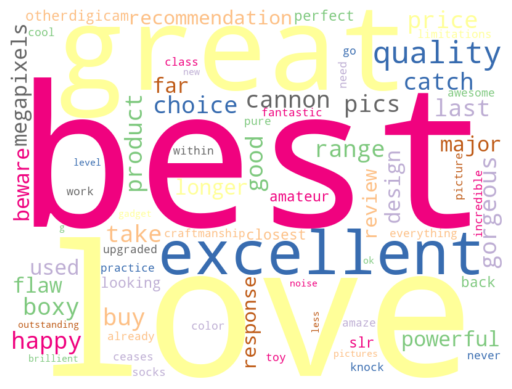

In [32]:
wordcloud = WordCloud(width = 800, height = 600, background_color = "white", colormap = 'Accent')
wordcloud.generate_from_frequencies(frequencies=word_freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[top](#e0)